# Chapter 7
# Ensemble Learning and Random Forests

The goal of ensemble learning is to combine the predictions of several base estimators in order to improve generalizability and robustness

>**Wisdom of the crowd:** the collective opinion of a group of individuals is often better than that of a single expert.

### Popular Ensemble methods
- Build several estimators *independently* and then average their predictions. On average, the combined estimator is usually better than any of the single base estimator.

**Examples:** Bagging, random forests.
- Build several estimators *sequentially* with each new one trying to reduce the bias of the previous estimators.

**Examples:** AdaBoost, Gradient Boost, XGBoost
- Build a model to aggregate the predictions of several other models. The second-level model learns to highlight where each base estimator performs best and discredit where it performs poorly.

**Examples** Stacking
- Build a model with multiple layers of basic models
<img src="Data/RF_Stacking.png" width="500">

Let's use the moon dataset to illustrate the power of ensemble methods

In [1]:
# Create a moon-shape dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.3)

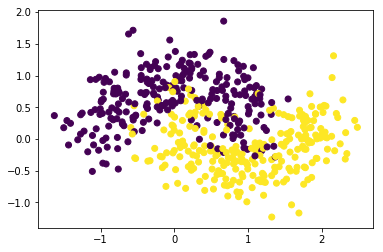

In [7]:
# Plot the data examples
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Model 1: A single decision tree

In [10]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split


In [2]:
# Apply a Decision Tree model to build a classifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
# Calculate the accuracy score on test set
from sklearn.metrics import accuracy_score


In [20]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):

    # find the range of each input features
    
    # create a mashgrid of size 100 * 100 
  
    # apply the model to predict for each point on the grid

    # use plt.contourf() to plot the decision regions
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Accent)
    
    # plot the data examples
    plt.scatter(X[:,0], X[:,1],s=35,c=y,cmap=plt.cm.cool)

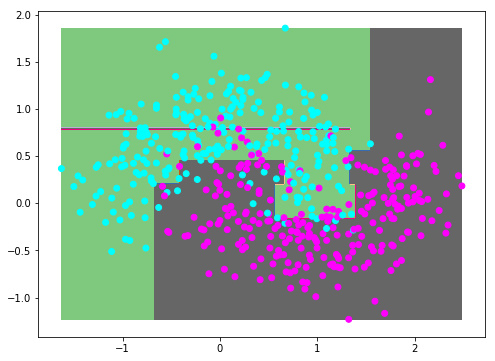

In [21]:
plot_decision_boundary(tree_clas,X,y)

### Model 2: Combining decision tree, logistic regression, and linear SVM

Let's train three classifiers and let them vote for the final decision

In [23]:
# Import classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf),
                ('svm', svm_clf),
                ('dt', dt_clf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svm', SVC(C=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [24]:
# Calculate accuracy score for each model
for clf in (lr_clf, svm_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, y_test_pred))

LogisticRegression 0.88
SVC 0.92
DecisionTreeClassifier 0.84
VotingClassifier 0.92


### Model 3: Bagging and Pasting
Another approach is to use the same training algorithm for every classifier, but to train them on different random subsets of the training set.
- When sampling is performed *with* replacement, this method is called **bagging**.
- When sampling is performed *without* replacement, it is called **pasting**.

Bagging and pasting allow training instances to be sampled several times across multiple classifiers, but only bagging allows training instances to be sampled several times for the same classifier.

Once all base models are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all models. The aggregation is typically the **majority vote** for classification, or the **average** for regression.

In [27]:
# Build an ensemble of 500 decision trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=5),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [28]:
# Compute accuracy score
y_test_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9


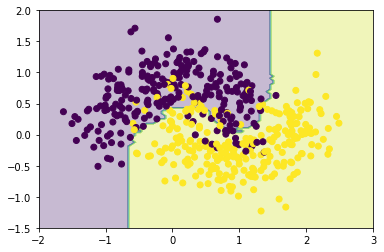

In [29]:
# Visualize the decision boundary


## Model 3: Random Forest
**Random forests** is also a bagging algorithm for decision trees. It differs from the above algorithm in only one way: they use a modified tree learning algorithm that selects, at each candidate split in the learning process, a **random subset of features**. This process is sometimes called **feature bagging**. 

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_test_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.88


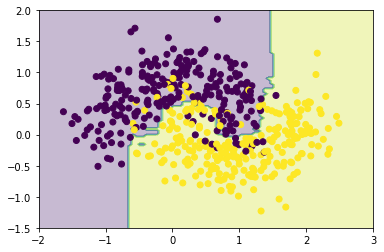

In [32]:
# Visualize the decision boundary


## Homework

We will need the TensorFlow library for the following week's study on neural networks. Please install TensorFlow in your computer. To check if the installation is successful, you can run the following code to show its version:

`import tensorflow as tf`
`tf